In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import scipy as sp
import scipy.special
import statsmodels.api as sm
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

In [6]:
xx = np.linspace(-10, 10, 1000)

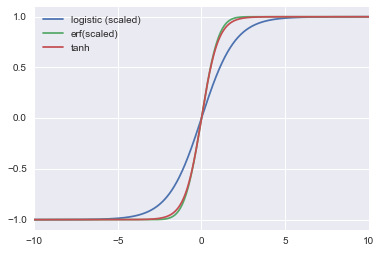

In [7]:
plt.plot(xx, (1/(1+np.exp(-xx))) * 2-1, label="logistic (scaled)")
plt.plot(xx, sp.special.erf(0.5 * np.sqrt(np.pi) * xx), label = "erf(scaled)")
plt.plot(xx, np.tanh(xx), label="tanh")
plt.ylim([-1.1, 1.1])
plt.legend(loc=2)
plt.show()

# Scikit Learn 패키지의 로지스틱 회귀

In [8]:
from sklearn.datasets import make_classification

X0, y = make_classification(n_features=1, n_redundant=0, n_informative=1, n_clusters_per_class=1, random_state=4)
X = sm.add_constant(X0)

In [9]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(X0, y)

In [10]:
np.exp(-model.coef_[0][0])

0.055077626743812613

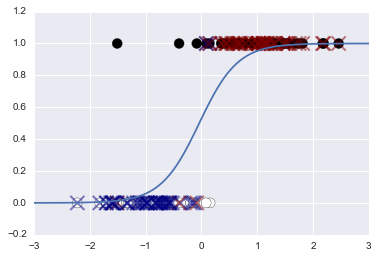

In [11]:
xx = np.linspace(-3,3,100)
sigm = 1.0 / (1 + np.exp(-model.coef_[0][0] * xx - model.intercept_[0]))
plt.plot(xx, sigm)
plt.scatter(X0, y, marker='o', c=y, s=100)
plt.scatter(X0, model.predict(X0), marker='x', c=y, s=200, lw=2, alpha=0.5, cmap=mpl.cm.jet)
plt.xlim(-3,3)
plt.show()

# statsmodels 패키지의 로지스틱 회귀

In [12]:
logit_mod = sm.Logit(y,X)
logit_res = logit_mod.fit(disp=0)
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Tue, 14 Jun 2016   Pseudo R-squ.:                  0.7679
Time:                        22:08:08   Log-Likelihood:                -16.084
converged:                       True   LL-Null:                       -69.295
                                        LLR p-value:                 5.963e-25
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.2515      0.477      0.527      0.598        -0.683     1.186
x1             4.2382      0.902      4.699      0.000         2.470     6.006


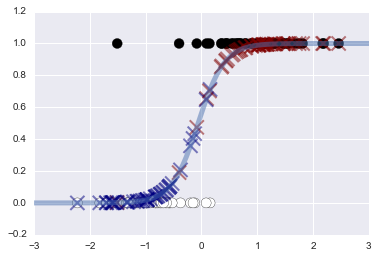

In [14]:
xx = np.linspace(-3,3,100)
sigmoid = logit_res.predict(sm.add_constant(xx))
plt.plot(xx, sigmoid, lw=5, alpha=0.5)
plt.scatter(X0, y, marker='o', c=y, s=100)
plt.scatter(X0, logit_res.predict(X), marker='x', c=y, s=200, lw=2, alpha=0.5, cmap=mpl.cm.jet)
plt.xlim(-3,3)
plt.show()